# Visualise Dataset

This notebook is used to play around with the dataset

In [7]:
from digit_classifier import train_test_datasets
import matplotlib.pyplot as plt
import numpy as np

In [8]:
train_set, _ = train_test_datasets()

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000


In [13]:
train_set[0][0].shape

torch.Size([784])

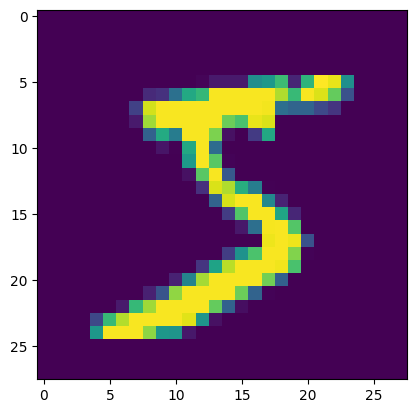

In [16]:
fig, ax = plt.subplots()
ax.imshow(train_set[0][0].detach().cpu().numpy().reshape(28,28))